## BUSINESS UNDERSTANDING

In [ ]:
#importing supportive libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
from scipy.stats import skew #Function to Determine skewness associated with variables in the data
from scipy.stats.stats import pearsonr #To find Correlation coefficient
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#Models for Prediction problem
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet,Ridge, BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import make_pipeline


#from sklearn.preprocessing import RobustScaler
#from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



#functions to support data splitting, Data Transformation and evaluation metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))


[]


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## DATA UNDERSTANDING

In [ ]:
#check the dimension of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from IPython.display import Image
Image("Advanced_Regression.png")

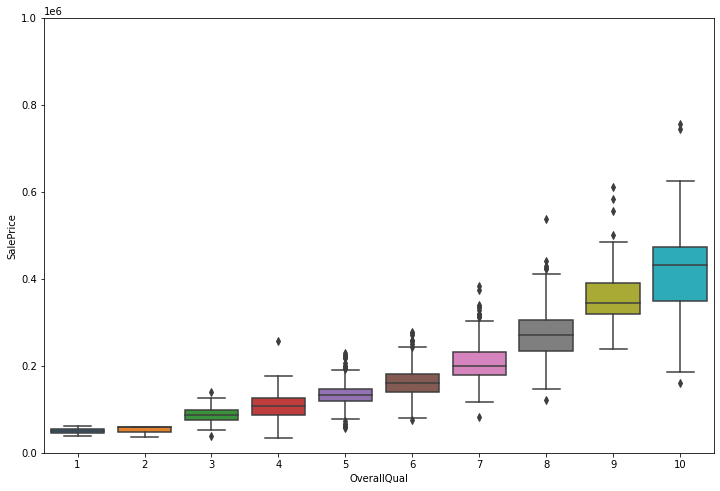

In [ ]:
#Box plot using seaborn
f, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(12, 8))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=1000000);

CORRELATIONS

In [ ]:
#generate correlation matrix for all the pair of variables
corr_matrix = train.corr()

In [ ]:
#Inspecting the top 10 variables which has higher postive correlation with the SalePrice (1st one is itself a SalePrice)
corr_matrix["SalePrice"].sort_values(ascending = False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

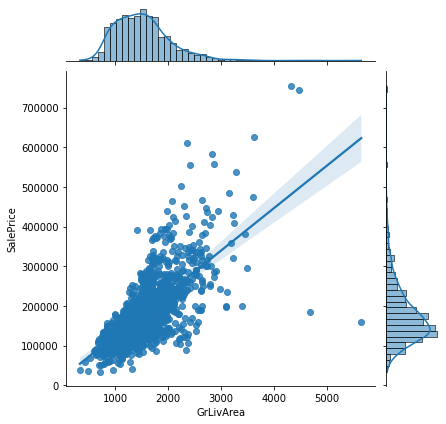

In [ ]:
#visualizing the missed out GrLivArea variable
sns.jointplot(x='GrLivArea',y='SalePrice',data=train,kind='reg')

In [ ]:
#Inspecting the top 15 variables which has higher postive correlation with the SalePrice
corr_matrix["SalePrice"].sort_values(ascending = False)[:15]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

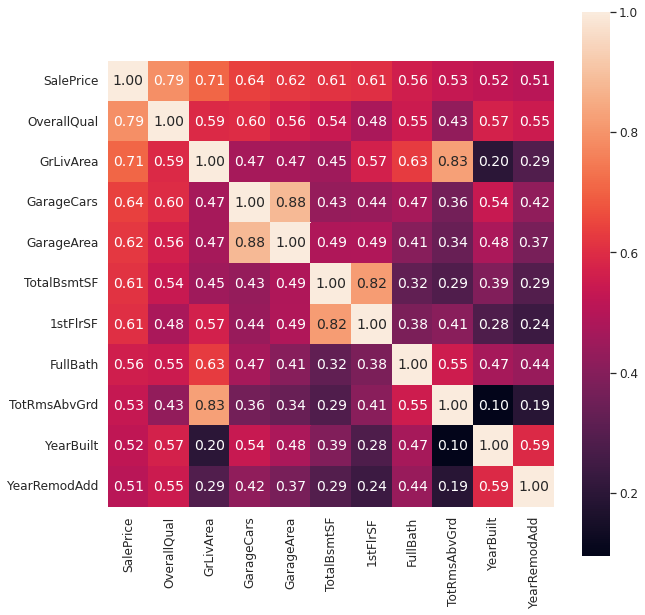

In [ ]:
#correlation matrix for top 10 variables
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
column_ind = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.1)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=column_ind.values, xticklabels=column_ind.values)

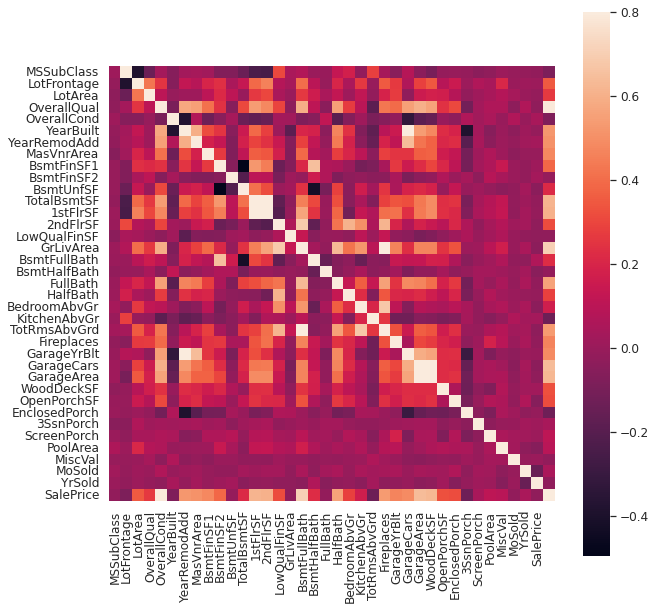

In [ ]:
#let's just try for good sake if any patterns could be found in the below all in all variable corr_matrix
sns.heatmap(corr_matrix[1:], vmax=.8, square=True,yticklabels=corr_matrix.columns[1:], xticklabels=corr_matrix.columns[1:])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

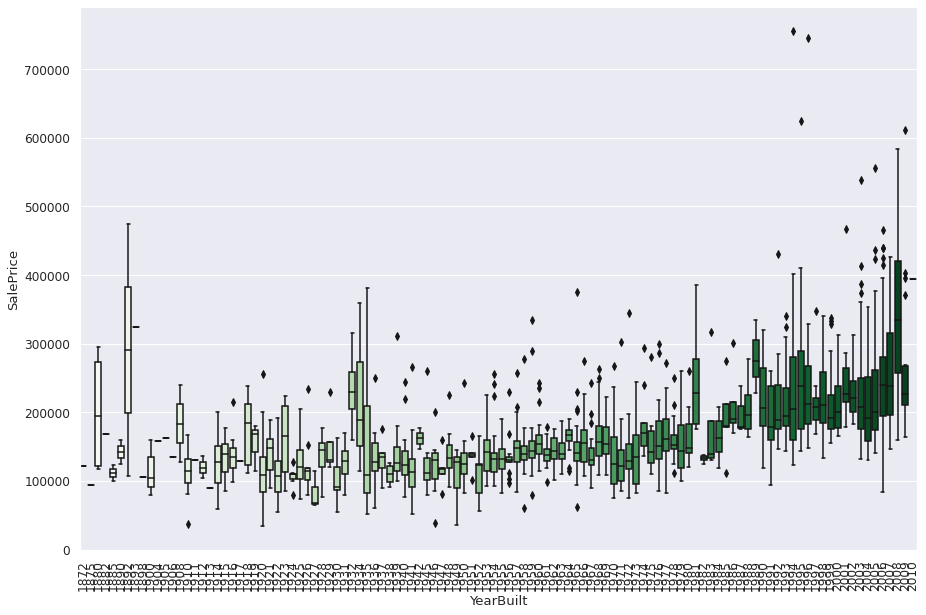

In [ ]:
#
rcParams["figure.figsize"] = 15,10
fig = sns.boxplot(x = "YearBuilt", y = "SalePrice", data  = train,palette = "Greens")
plt.xticks(rotation = 90)

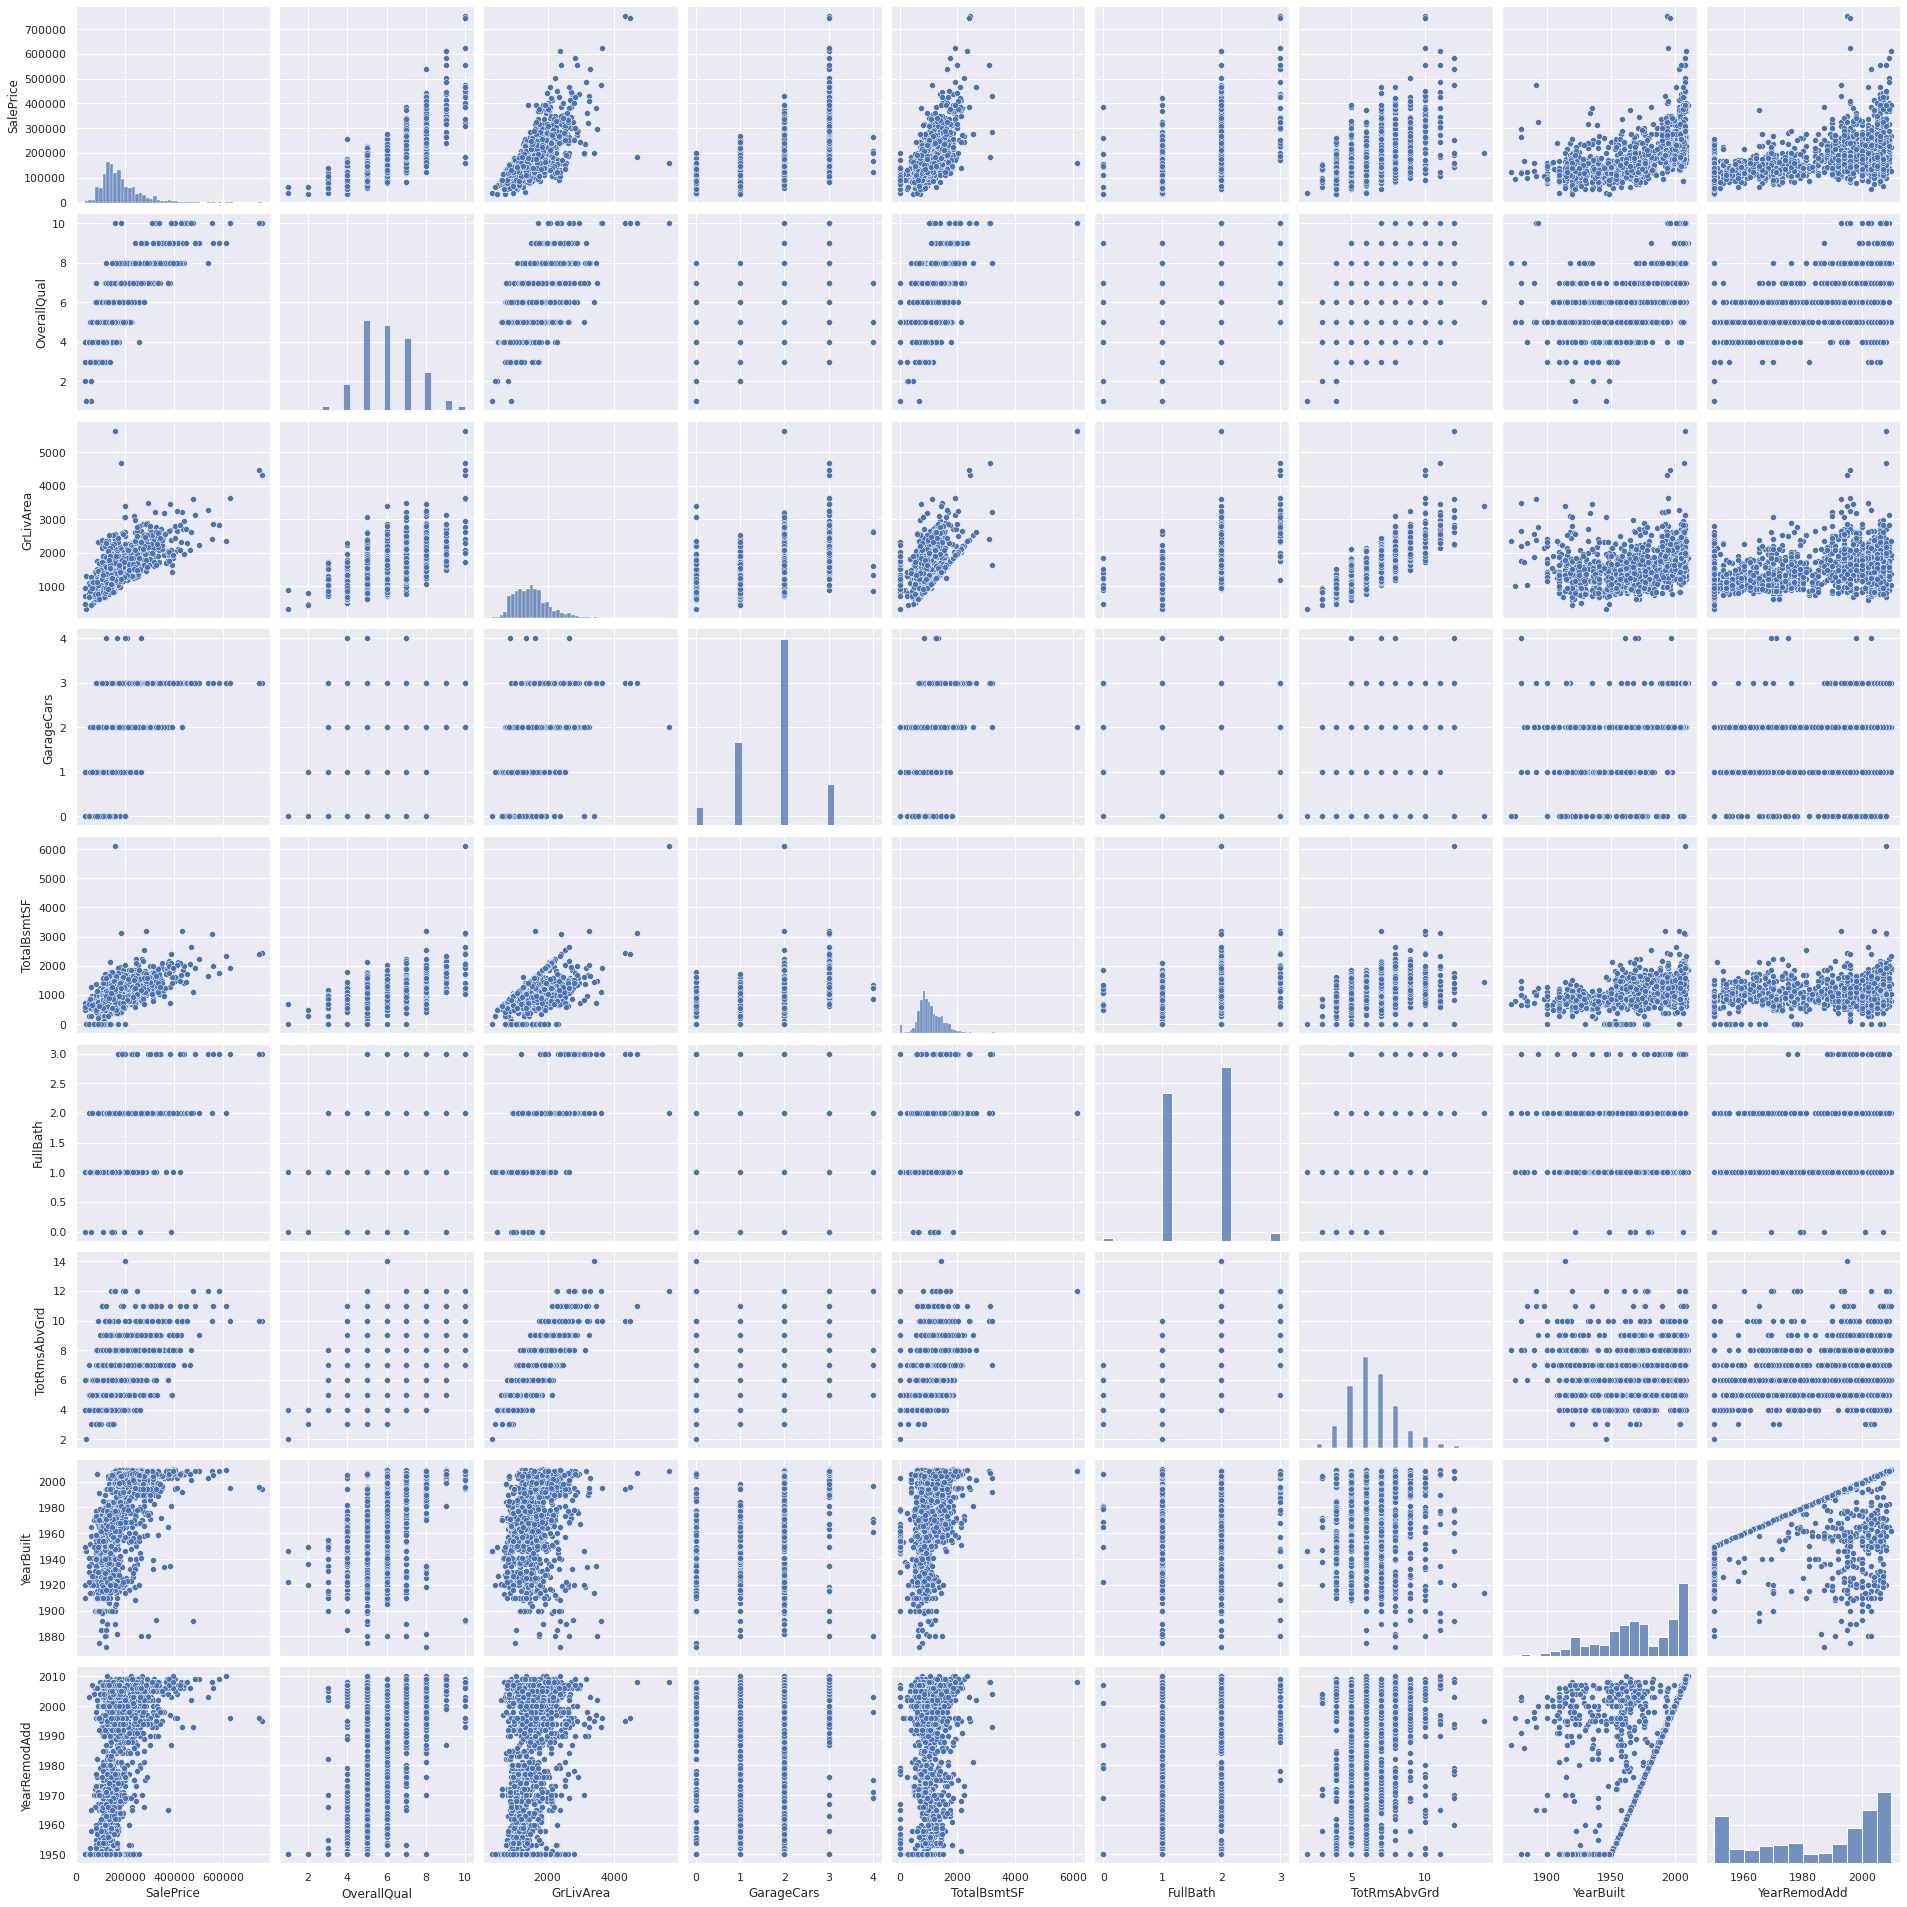

In [ ]:
sns.set()
sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']], size = 3)
plt.show();

## DATA PREPARATION

### DATA CLEANSING

In [ ]:
#making a copy of both train and test set for future reference and reduce redundancy in loading the data again
train_copy = train.copy()
test_copy = test.copy()

#Dropping the ID variable
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#getting output values for later to be used for training in the model

In [ ]:
#printing the dimensions of the data
print("Shape of the training data copy:{}".format(train_copy.shape))
print("Shape of the Original train data {}".format(train.shape))
print("-"*160)
print("Shape of the test data copy:{}".format(test_copy.shape))
print("Shape of the Original test data {}".format(test.shape))

Shape of the training data copy:(1460, 81)
Shape of the Original train data (1460, 80)
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Shape of the test data copy:(1459, 80)
Shape of the Original test data (1459, 79)


In [ ]:
#Concatenate train and test
fulldata = pd.concat([train, test])
fulldata = fulldata.reset_index(drop = True)

In [ ]:
missing_data = train.isnull().apply(sum).sort_values(ascending = False)
missing_col_name = missing_data[missing_data > 0]
print(missing_col_name)
print("There are {} variables with missing values".format(len(missing_col_name)))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
There are 19 variables with missing values


In [ ]:
#Fetching the names of the attributes that has missing values
missing_col_name = missing_data[missing_data > 0]
corr_matrix_missing = train[missing_col_name.index]
corr_matrix_missing["SalePrice"] = train["SalePrice"]

In [ ]:
missing_corr_values = corr_matrix_missing.corr()

In [ ]:
#checking numerical variables correlation as well as finding out how many categorical variables have missing value.
missing_corr_values["SalePrice"].sort_values(ascending = False)

SalePrice      1.000000
GarageYrBlt    0.486362
MasVnrArea     0.477493
LotFrontage    0.351799
Name: SalePrice, dtype: float64

In [ ]:
fulldata_missing = fulldata.isnull().sum().sort_values(ascending = False)
fulldata_missing_colname = fulldata_missing[fulldata_missing > 0]
print(fulldata_missing_colname)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
Exterior2nd        1
Exterior1st        1
GarageArea         1
GarageCars         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64


In [ ]:
#features that has same conventions as Alley Access - filled with None. Note - I am giving "None" instead of zero here because they are Qualitaive varaibles.
#The categories are class labels in text. We will later convert some of these variables using LabelEncoder.
NoneFill = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType", "GarageFinish", "GarageQual", "GarageCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","MasVnrType"]

for item in NoneFill:
    fulldata[item] = fulldata[item].fillna("None")

In [ ]:
#These categorical Labels already are in numeric categorical form and hence do not require encoding, however, conversion to dummy variables can be done
ZeroFill = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea']

for item in ZeroFill:
    fulldata[item] = fulldata[item].fillna(0)

In [ ]:
fulldata["LotFrontage"] = fulldata.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
ModeFill = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Utilities']

for item in ModeFill:
    fulldata[item] = fulldata[item].fillna(fulldata[item].mode()[0])

In [ ]:
fulldata["Functional"] = fulldata["Functional"].fillna("Typ")

In [ ]:
#Dropping the SalePirce variable from fulldata
fulldata.drop("SalePrice", axis = 1, inplace = True)

In [ ]:
#Checking if Missing values still persist in our data
fulldata.isnull().any().any()

False

Outliers

Text(0, 0.5, 'Sale Price')

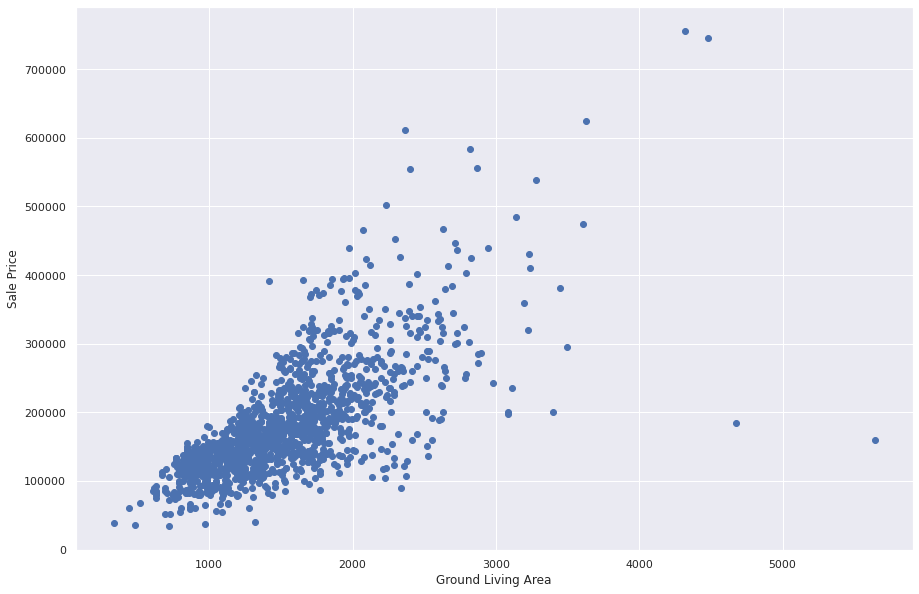

In [ ]:
#plots to visualize GrLivArea Outlier
f, ax = plt.subplots()
ax.scatter(x = train["GrLivArea"],y = train["SalePrice"])
ax.set_xlabel("Ground Living Area")
ax.set_ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

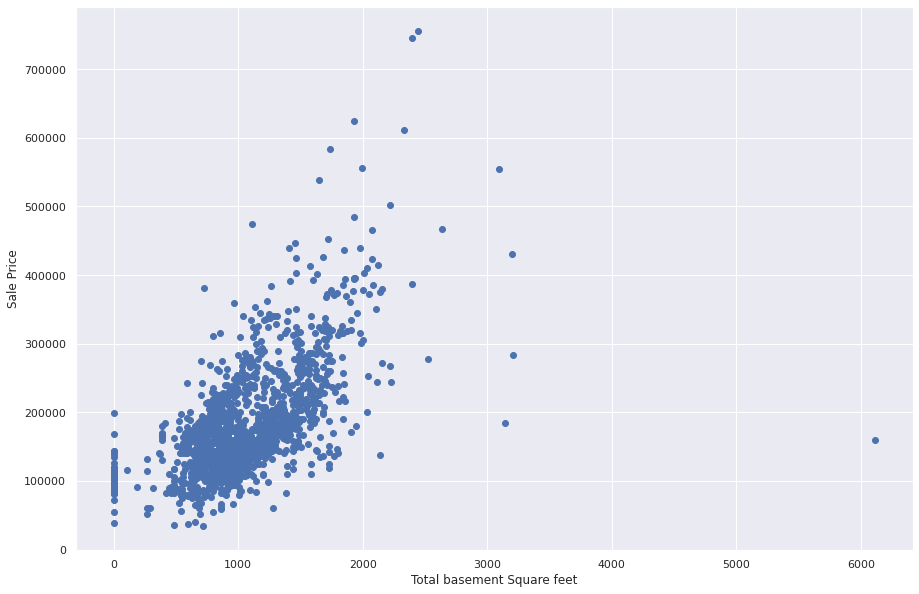

In [ ]:
#Plot to Visualize TotalBsmtSF outlier
f,ax = plt.subplots()
ax.scatter(x = train["TotalBsmtSF"], y = train["SalePrice"])
ax.set_xlabel("Total basement Square feet")
ax.set_ylabel("Sale Price")

In [ ]:
TotalBsmtSF_row = train.loc[(train["TotalBsmtSF"] > 6000) & (train["SalePrice"] < 200000)]
GrLivArea_row = train.loc[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)]

In [ ]:
TotalBsmtSF_row

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
GrLivArea_row

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
#Removing the outliers from both the dataset - kindly note to follow the same order while removing the oulier.
#1st remove the outlier from fulldata dataset then remove from train dataset
#Because once you remove the outlier from train data, you wont get the index to remove it from fulldata.
fulldata = fulldata.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)
fulldata = fulldata.reset_index(drop = True)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)
train = train.reset_index(drop = True)

In [ ]:
print("Merged Full Data Shape:{}".format(fulldata.shape))
print("-"*160)
print("Training Data Shape:{}".format(train.shape))
print("-"*160)
print("Test Data Shape:{}".format(test.shape))

Merged Full Data Shape:(2917, 79)
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Training Data Shape:(1458, 80)
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Test Data Shape:(1459, 79)


## Data Transformation

In [ ]:
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',

In [ ]:
#MSSubClass=The building class
fulldata['MSSubClass'] = fulldata['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
fulldata['OverallCond'] = fulldata['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
fulldata['YrSold'] = fulldata['YrSold'].astype(str)
fulldata['MoSold'] = fulldata['MoSold'].astype(str)
fulldata['YearBuilt'] = fulldata['YearBuilt'].astype(str)
fulldata['YearRemodAdd'] = fulldata["YearRemodAdd"].astype(str)

Label Encoding :

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','YearBuilt', "YearRemodAdd")
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(fulldata[c].values)) 
    fulldata[c] = lbl.transform(list(fulldata[c].values))

# shape        
print('Shape all_data: {}'.format(fulldata.shape))

Shape all_data: (2917, 79)


In [ ]:
int_features = fulldata.dtypes[fulldata.dtypes == "int64"].index
float_features = fulldata.dtypes[fulldata.dtypes == "float64"].index

# Check the skew of all numerical features
skewed_int_feats = fulldata[int_features].apply(lambda x: skew(x.dropna()))
skewed_float_feats = fulldata[float_features].apply(lambda x: skew(x.dropna()))

skewed_features = pd.concat([skewed_int_feats,skewed_float_feats])

print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness = skewness.sort_values('Skew', ascending = False)
skewness.head(15)


Skewness in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to log(x+1) transform".format(skewness.shape[0]))
skewed_features = skewness.index
for features in skewed_features:
    fulldata[features] = np.log1p(fulldata[features])

There are 58 skewed numerical features to log(x+1) transform


Categorical to Dummy Variables

In [ ]:
fulldata = pd.get_dummies(fulldata)
print(fulldata.shape)

(2917, 221)


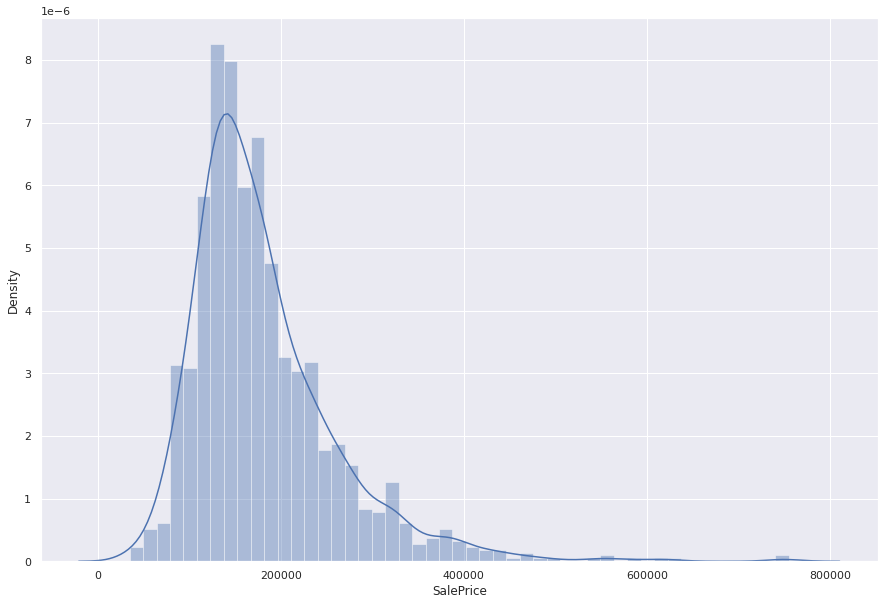

In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [ ]:
y_train = train.SalePrice.values

In [ ]:
#splitting the data to train the model
x_train = fulldata[:train.shape[0]]

In [ ]:
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))

x_train shape:(1458, 221)
y_train shape:(1458,)


## MODELING AND EVALUATION

In [ ]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['KernelRidge:',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)],
           ['LassoLarsIC :',LassoLarsIC()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)],
           ['Lasso: ', Lasso(alpha =0.0005, random_state=1)],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)],
           ['XGB: ',xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)],['LGB: ',lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)]]

In [ ]:
print("Score of Models...")

for name,model in models:
    ModelTemp = make_pipeline(StandardScaler(),model)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = 10))
    print("Average {} cross validation score: ".format(name), np.mean(rmse))

Score of Models...
Average DecisionTree : cross validation score:  0.19498097926709534
Average RandomForest : cross validation score:  0.136398682801873
Average KNeighbours : cross validation score:  0.25298446424161714
Average KernelRidge: cross validation score:  0.11483980575918792
Average LassoLarsIC : cross validation score:  0.1159076334537565
Average GradientBoostingClassifier:  cross validation score:  0.11294336383125195
Average Lasso:  cross validation score:  0.1136112564038185
Average Ridge:  cross validation score:  0.11723433264189254
Average BayesianRidge:  cross validation score:  0.11504056191502651
Average ElasticNet:  cross validation score:  0.11341064560148983
Average XGB:  cross validation score:  0.11504112066413999
Average LGB:  cross validation score:  0.11448875274479135
